In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from tools import esn_prediction, MSE
from optimizers import grid_optimizer

In [2]:
rd.seed(85)
N = 1000
t = np.linspace(0,6*np.pi, N)
noisy_cos = np.cos(t) + (2*rd.random(N)-1)/10
smooth_cos = np.cos(t)

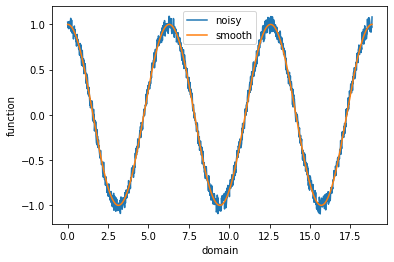

In [3]:
plt.plot(t, noisy_cos, label='noisy')
plt.plot(t, smooth_cos, label='smooth')
plt.legend()
plt.xlabel('domain')
plt.ylabel('function')
plt.show()

In [4]:
X_in = np.concatenate([[noisy_cos, smooth_cos]], axis=1)

In [5]:
params = {'n_reservoir':2000, 
          'sparsity':0.1, 
          'rand_seed':85, 
          'rho':0.7, 
          'noise':0.001, 
          'future':144, 
          'window':None, 
          'trainlen':800}

In [6]:
pred = esn_prediction(noisy_cos, params)

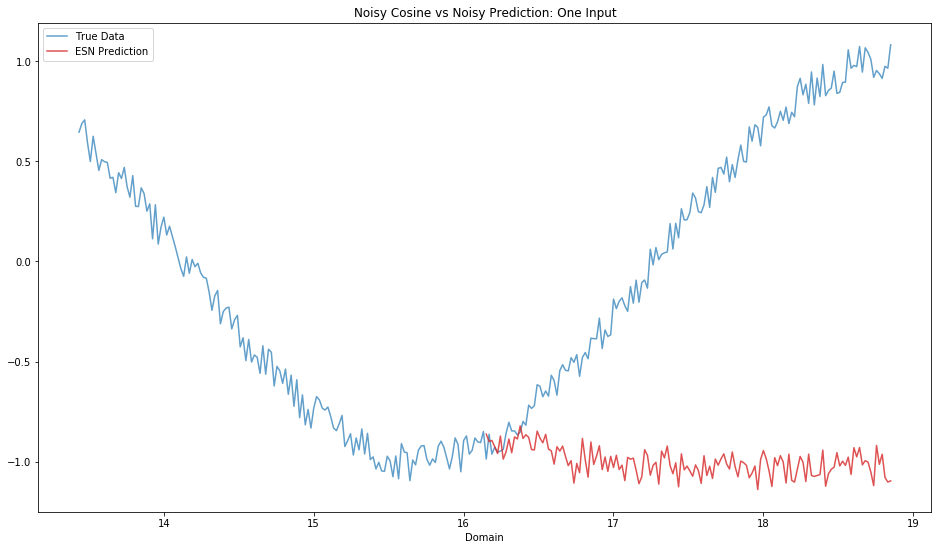

In [15]:
futureTotal = params['future']
plt.figure(figsize=(16,9))
plt.title("Noisy Cosine vs Noisy Prediction: One Input")
plt.xlabel("Domain")
plt.plot(t[-2*futureTotal:],
         noisy_cos[-2*futureTotal:],
         'b',label="True Data", 
         alpha=0.7,
         color='tab:blue')
plt.plot(t[-futureTotal:], pred,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')
plt.legend()

In [8]:
pred2 = esn_prediction(X_in.T, params)

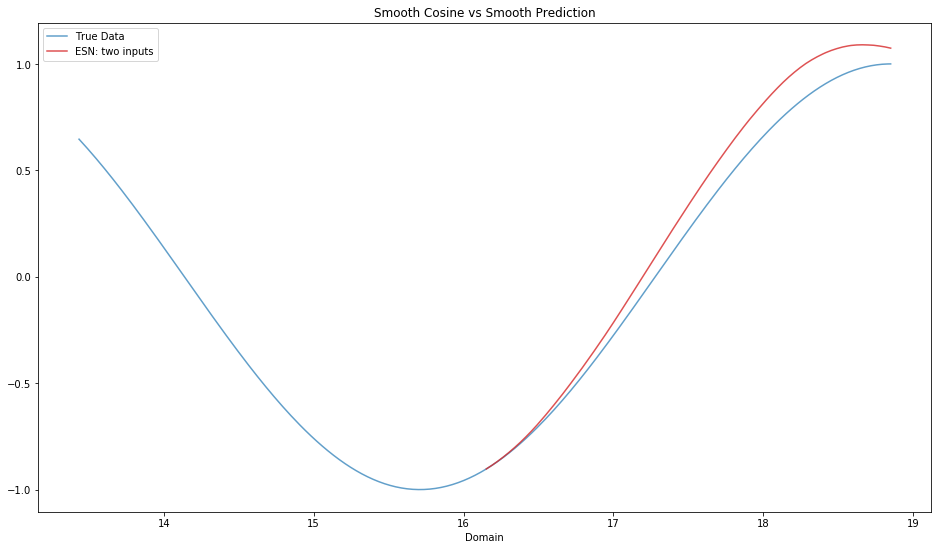

In [16]:
plt.figure(figsize=(16,9))
plt.title("Smooth Cosine vs Smooth Prediction")
plt.xlabel("Domain")
plt.plot(t[-2*futureTotal:],
         smooth_cos[-2*futureTotal:],
         'b',label="True Data", 
         alpha=0.7,
         color='tab:blue')
plt.plot(t[-futureTotal:], pred2.T[1],  alpha=0.8, 
         label='ESN: two inputs',
         color='tab:red',
         linestyle='-')
plt.legend()

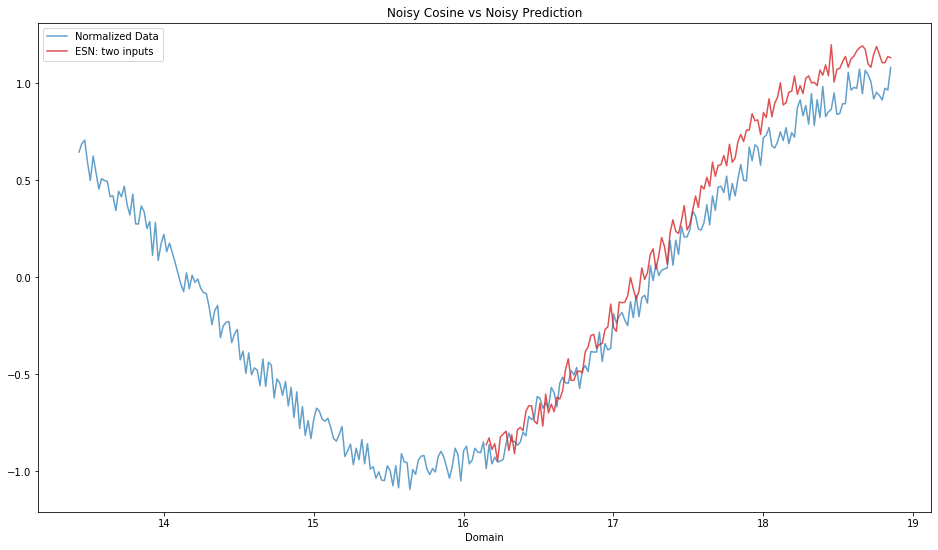

In [17]:
plt.figure(figsize=(16,9))
plt.xlabel("Domain")
plt.title("Noisy Cosine vs Noisy Prediction")
plt.plot(t[-2*futureTotal:],
         noisy_cos[-2*futureTotal:],
         'b',label="Normalized Data", 
         alpha=0.7,
         color='tab:blue')
plt.plot(t[-futureTotal:], pred2.T[0],  alpha=0.8, 
         label='ESN: two inputs',
         color='tab:red',
         linestyle='-')
plt.legend()

Optimizing over ['trainlen']:
trainlen = 300, MSE=7.323230482254089
trainlen = 400, MSE=0.04965773845769825
trainlen = 500, MSE=0.05346224841884565
trainlen = 600, MSE=0.09348267781624556
trainlen = 700, MSE=0.07066860158684977


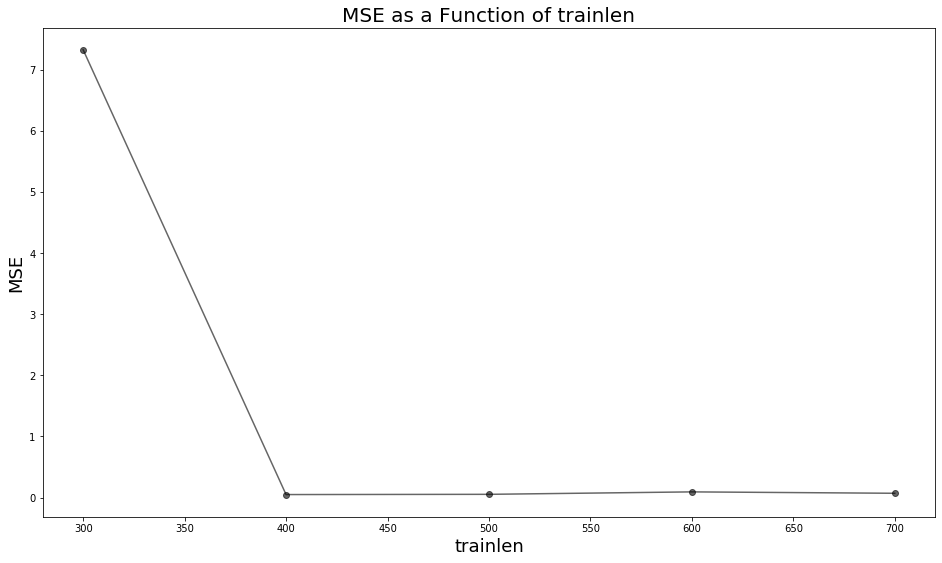

In [11]:
trainingLengths = np.arange(300,800,100)
loss_one = grid_optimizer(X_in.T,
                      params,
                      args=['trainlen'],
                      xset=trainingLengths,
                      verbose=True,
                      visualize=True)

Optimizing over ['n_reservoir', 'sparsity']:
n_reservoir = 1000, sparsity = 0.005, MSE=101.81294933575396
n_reservoir = 1000, sparsity = 0.01, MSE=97.36947337107472
n_reservoir = 1000, sparsity = 0.03, MSE=95.31856808928708
n_reservoir = 1500, sparsity = 0.005, MSE=0.06203732225663476
n_reservoir = 1500, sparsity = 0.01, MSE=0.05628875730877411
n_reservoir = 1500, sparsity = 0.03, MSE=0.05585395597791134
n_reservoir = 2000, sparsity = 0.005, MSE=0.06831477874254639
n_reservoir = 2000, sparsity = 0.01, MSE=0.06988845823910787
n_reservoir = 2000, sparsity = 0.03, MSE=0.06008436981357084


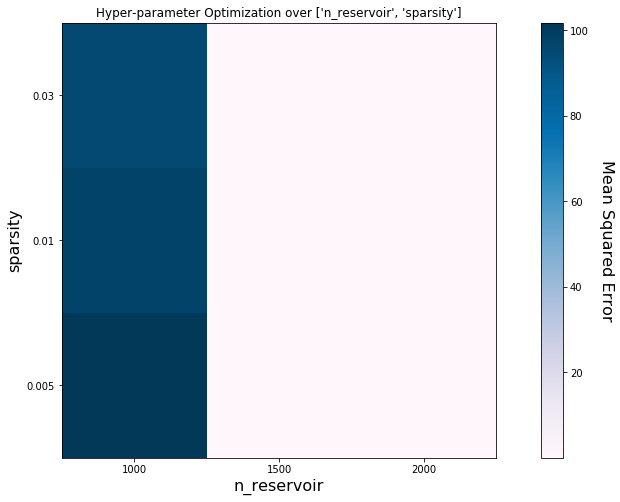

In [12]:
reservoir_set = [1000, 1500, 2000]
sparsity_set = [0.005, 0.01, 0.03]
loss_two = grid_optimizer(X_in.T,
                      params,
                      args=['n_reservoir', 'sparsity'],
                      xset=reservoir_set,
                      yset=sparsity_set,
                      verbose=True,
                      visualize=True)

Optimizing over ['trainlen']:
trainlen = 300, MSE=1.2873696031033737
trainlen = 400, MSE=1.2969307429814496
trainlen = 500, MSE=1.3157236858832015
trainlen = 600, MSE=1.2875458148976273
trainlen = 700, MSE=1.2981329689639725


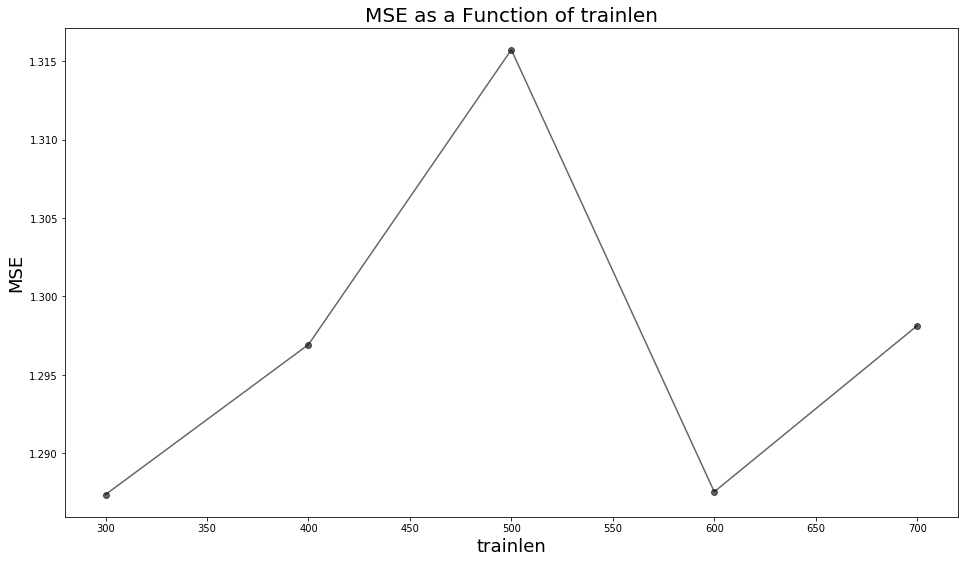

In [13]:
trainingLengths = np.arange(300,800,100)
loss_onevar = grid_optimizer(noisy_cos,
                      params,
                      args=['trainlen'],
                      xset=trainingLengths,
                      verbose=True,
                      visualize=True)